In [7]:
# Load modules
import os
import pandas as pd
import json
import csv
import time
from dateutil.relativedelta import relativedelta
import datetime
from psaw import PushshiftAPI # https://github.com/dmarx/psaw
from glob import glob
import matplotlib

import requests


## Looking at the "hole" in submissions

### Pushshift API

In [8]:
import requests

url = "https://api.pushshift.io/reddit/search/submission"

# Get before feb 2019 and after September 2018 (eyeballing from graph) by month

# Oct 1 2018 to Oct 31 2018
start_oct_2018 = datetime.datetime(2018, 10, 1, 0, 0).strftime('%s')
end_oct_2018 = datetime.datetime(2018, 10, 31, 0, 0).strftime('%s')

# Nov 1 2018 to Nov 30 2018
start_nov_2018 = datetime.datetime(2018, 11, 1, 0, 0).strftime('%s')
end_nov_2018 = datetime.datetime(2018, 11, 30, 0, 0).strftime('%s')

# Dec 1 2018 to Dec 31 2018
start_dec_2018 = datetime.datetime(2018, 12, 1, 0, 0).strftime('%s')
end_dec_2018 = datetime.datetime(2018, 12, 31, 0, 0).strftime('%s')

# Jan 1 2019 to Jan 31 2019
start_jan_2019 = datetime.datetime(2019, 1, 1, 0, 0).strftime('%s')
end_jan_2019 = datetime.datetime(2019, 1, 31, 0, 0).strftime('%s')

# Feb 1 2019 to Feb 28 2019
start_feb_2019 = datetime.datetime(2019, 2, 1, 0, 0).strftime('%s')
end_feb_2019 = datetime.datetime(2019, 2, 28, 0, 0).strftime('%s')

# Add to lists
start_dates = [start_oct_2018, start_nov_2018, start_dec_2018, start_jan_2019, start_feb_2019]
end_dates = [end_oct_2018, end_nov_2018, end_dec_2018, end_jan_2019, end_feb_2019]


submissions = []
comments = []
sub_url = "https://api.pushshift.io/reddit/search/submission"
com_url = "https://api.pushshift.io/reddit/search/comment"

for i in range(0, len(start_dates)):    
    # Make submission request
    sub_result = requests.get(sub_url, params = {"subreddit": "TheRedPill", "size": 0, "aggs" : "subreddit", "before": end_dates[i], "after": start_dates[i]}).json()["aggs"]
    submissions.append(sub_result["subreddit"])
    
    # Make comment request
    com_result = requests.get(com_url, params = {"subreddit": "TheRedPill", "size": 0, "aggs" : "subreddit", "before": end_dates[i], "after": start_dates[i]}).json()["aggs"]
    comments.append(com_result["subreddit"])

In [9]:
submissions

[[], [], [], [], [{'doc_count': 278, 'key': 'TheRedPill'}]]

In [10]:
comments

[[{'doc_count': 10422, 'key': 'TheRedPill'}],
 [{'doc_count': 9416, 'key': 'TheRedPill'}],
 [{'doc_count': 10609, 'key': 'TheRedPill'}],
 [],
 []]

### Reddit API

In [11]:
# NEED TO DO

## Mentions of trp.red in the subreddit

In [12]:
# Aggregate figures
sub_url = "https://api.pushshift.io/reddit/search/submission"
com_url = "https://api.pushshift.io/reddit/search/comment"

sub_query = requests.get(sub_url, params = {"subreddit": "TheRedPill", "q" : "trp.red", "size": 0, "aggs" : "subreddit"}).json()["aggs"]
# 106 posts with "trp.red" in entire subreddit 

com_query = requests.get(com_url, params = {"subreddit": "TheRedPill", "q" : "trp.red", "size": 0, "aggs" : "subreddit"}).json()["aggs"]
# 967 comments with "trp.red" in entire subreddit





In [13]:
## FUNCTIONS ## 

def get_comments(subreddit):
    """Crawl comments from a subreddit
    :param subreddit: The subreddit to crawl.
    :param max_submissions: The max number of comments to download.
    :return: empty - saved file"""

    api = PushshiftAPI()


    gen = api.search_comments(subreddit = subreddit,\
                             q = "trp.red",\
                             sort = "desc",\
                             size = 500,\
                             sort_type = "created_utc")


    comments = []

    for c in gen:
        comments.append(c)
        
    df = pd.DataFrame([obj.d_ for obj in comments])
        
    return df


In [14]:
# Pulling the posts and submissions themselves
# don't need pagination since each <500 items
sub_trpred = requests.get(sub_url, params = {"subreddit": "TheRedPill",\
                                            "q" : "trp.red",\
                                            "sort" : "desc",
                                            "size": "500",\
                                            "sort_type": "created_utc"}).json()["data"]
df_subkeyword = pd.DataFrame(sub_trpred)

df_comkeyword = get_comments("TheRedPill")




In [15]:
list(df_subkeyword.columns)
df_subkeyword['retrieved_on']

0      1591094355
1      1588805885
2      1587466301
3      1585937204
4      1583564115
          ...    
101    1463501069
102    1463492791
103    1463480145
104    1463463116
105    1463445474
Name: retrieved_on, Length: 106, dtype: int64

In [16]:
df_comkeyword

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,collapsed,collapsed_reason,controversiality,gilded,nest_level,subreddit_name_prefixed,subreddit_type,reply_delay,rte_mode,score_hidden
0,[],NaN,TheRedPike,,moderator,"[{'e': 'text', 't': 'mod'}]",NaN,mod,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,LastRevision,,endorsement points,"[{'e': 'text', 't': 'Endorsed Contributor'}]",NaN,Endorsed Contributor,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,assa_ssin,None,None,[],NaN,None,None,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,redpillschool,,moderator,"[{'e': 'text', 't': 'Mod'}]",NaN,Mod,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,LastRevision,,endorsement points,"[{'e': 'text', 't': 'Endorsed Contributor'}]",NaN,Endorsed Contributor,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,NaN,NaN,redpillschool,NaN,moderator,NaN,NaN,Mod,NaN,NaN,...,NaN,NaN,0.0,0.0,2.0,NaN,NaN,84.0,NaN,NaN
967,NaN,NaN,-Anteros-,NaN,points,NaN,NaN,IRC Mod,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,NaN,NaN,978.0,NaN,NaN
968,NaN,NaN,redpillschool,NaN,moderator,NaN,NaN,Mod,NaN,NaN,...,NaN,NaN,0.0,0.0,2.0,NaN,NaN,89745.0,NaN,NaN
969,NaN,NaN,DannyDemotta,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,NaN,0.0,0.0,8.0,NaN,NaN,59669.0,NaN,NaN


In [17]:
# Clean / format date
df_subkeyword['created_date'] = pd.to_datetime(df_subkeyword['created_utc'], unit = "s").dt.date 
df_comkeyword['created_date'] = pd.to_datetime(df_comkeyword['created_utc'], unit = "s").dt.date 


In [18]:
# Earliest and latest mentions
subkeyword_earliest = min(df_subkeyword['created_date'])
subkeyword_latest = max(df_subkeyword['created_date'])
print("the earliest mention of trp.red in submissions was: " + str(subkeyword_earliest))
print("the latest mention of trp.red in submissions was: " + str(subkeyword_latest))


comkeyword_earliest = min(df_comkeyword['created_date'])
comkeyword_latest = max(df_comkeyword['created_date'])
print("the earliest mention of trp.red in comments was: " + str(subkeyword_earliest))
print("the latest mention of trp.red in comments was: " + str(subkeyword_latest))


the earliest mention of trp.red in submissions was: 2016-03-04
the latest mention of trp.red in submissions was: 2020-06-02
the earliest mention of trp.red in comments was: 2016-03-04
the latest mention of trp.red in comments was: 2020-06-02


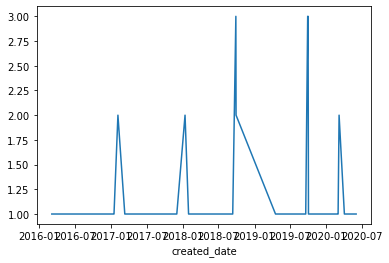

In [19]:
plot_submissions = df_subkeyword.groupby('created_date').id.count().plot()

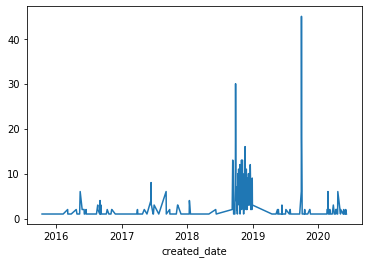

In [20]:
plot_comments = df_comkeyword.groupby('created_date').id.count().plot()

## Using Reddit API (PRAW) 

 ### Link: https://github.com/praw-dev/praw

In [21]:
import praw

reddit = praw.Reddit(client_id="M5lv3Bhf_x9TNw", client_secret="qiJ5mtjQlkElsJUCn6k_kf50M7c",\
                     user_agent="python:script:v1 (by /u/thrownaway8yrsago)",\
                    user = "thrownaway8yrsago",\
                    password = "yCzFsR7_Vu.Y")


In [22]:
subreddit = reddit.subreddit("TheRedPill")
subreddit.quaran.opt_in()

In [23]:
#iterating through the 10 submissions marked hot

submissions = []

# keep_cols = ['author','id', 'title','created_utc',\
#              'selftext', 'score', 'num_comments']

for submission in subreddit.new(limit = 1000):
    title = submission.title  # Output: the submission's title
    score = submission.score # Output: the submission's upvotes
    author = submission.author # Output: the submission's author
    post_id = submission.id    # Output: the submission's ID
    created_utc = submission.created_utc    # Output: the utc date when post was created
    selftext = submission.selftext # Output: the submissions's text
    num_comments = submission.num_comments  # Output: the submissions's text
    
    
    submission_dict = {"author": author, "id" : post_id, "title" : title,\
                "created_utc" : created_utc, "selftext" : selftext,\
               "score" : score, "num_comments" : num_comments}
    
    submissions.append(submission_dict)


NOTE: Got this API working but can't get submissions from a certain time period -- the method was deprecated in 2018 (https://github.com/praw-dev/praw/issues/853). Can only get 1000 posts. 

Also having trouble scraping TheRedPill since it's quarantined (https://www.reddit.com/r/redditdev/comments/9zv2e5/cant_scrape_optedin_quarantined_subreddits_in_praw/). I can only get past 5 months (based on Reddit manual scrolling) and to June 2019 using the API (last 1000 posts). 

Tried to get info from wayback machine but it seems blank after the quarantine started (only captured the "opt in" page - https://web.archive.org/web/20180701000000*/reddit.com/r/theredpill)

In [24]:
import datetime 

last_time = submissions[-1]["created_utc"]

print("Latest post from Reddit API: "+datetime.datetime.fromtimestamp(int(last_time)).strftime('%Y-%m-%d %H:%M:%S'))


Latest post from Reddit API: 2016-09-20 11:31:23


## Find intersection of users between trp.red and r/TRP

### Mods

In [25]:
subred_mods = ["redpillschool", "darkredmatter", "trpbot", "CrazyHorseInvincible",\
               "bsutansalt", "EpicLevelCheater", "AutoModerator", "Halitenina",\
               "SlyGradient", "TheRedPike", "LegendOfTheFrontier", "VigilantRedRooster"]

df_trpauthors = pd.read_csv("data/raw/trpred_scrape/authors_202005191336.csv")
df_trpauthors

trpred_authors = list(df_trpauthors['name'])

# Get intersection
intersect_mods = list(set(subred_mods) & set(trpred_authors))
# ['TheRedPike', 'redpillschool', 'bsutansalt'] -- the intersection btwn mods in r/TRP and trp.red authors

# Get how much they post

df_trpposts = pd.read_csv("data/raw/trpred_scrape/trpposts_202005191336.csv") # load posts

dict_intersect_mods = {}

for i in intersect_mods:
    perauthor = df_trpposts['author'].value_counts()
    dict_intersect_mods[i] = perauthor[i]


print(dict_intersect_mods)

{'bsutansalt': 73, 'TheRedPike': 37, 'redpillschool': 1655}


In [26]:
dict_intersect_mods

{'bsutansalt': 73, 'TheRedPike': 37, 'redpillschool': 1655}

### Find intersection of all other users 

In [27]:
# Load in csv of users from posts
df_subredposts = pd.read_csv("data/processed/submissions/TheRedPill-submissions-2020-06-01.csv")


In [28]:
# Remove old index column
df_subredposts = df_subredposts.drop(columns = 'Unnamed: 0')
list(df_subredposts.columns.values) # check


['author',
 'id',
 'title',
 'created_utc',
 'selftext',
 'score',
 'num_comments',
 'subreddit']

## FIND HOW ACTIVE THE USERS ON BOTH SITES ARE

In [57]:
subred_authors = pd.DataFrame(df_subredposts['author'].value_counts())
subred_authors = subred_authors.rename(columns={"author": "count"})
subred_authors.index.name = 'author'
subred_authors.reset_index(inplace = True)


In [68]:
intersect_authors = subred_authors[subred_authors.author.isin(intersect_all)]

print(str(intersect_authors['count'].median()))


print(str(df_subredposts['author'].value_counts().median()))

4.0
1.0


In [60]:
pd.DataFrame(df_subredposts['author'].value_counts())

,author
[deleted],32861
redpillschool,615
Rollo-Tomassi,288
bsutansalt,248
GayLubeOil,248
...,...
EndiBeqiriFitness,1
duodan,1
Gabitandil,1
toxicpast,1


In [29]:
# Get authors
subredposts_authors = list(df_subredposts['author'])
subredposts_authors

# Get intersection
intersect_all = list(set(subredposts_authors) & set(trpred_authors))


In [30]:
len(intersect_all)
# 132 overlapping users

132

## Get other subreddits that intersecting users post in

In [31]:
# import praw

# reddit = praw.Reddit(client_id="M5lv3Bhf_x9TNw", client_secret="qiJ5mtjQlkElsJUCn6k_kf50M7c",\
#                      user_agent="python:script:v1 (by /u/thrownaway8yrsago)",\
#                     user = "thrownaway8yrsago",\
#                     password = "yCzFsR7_Vu.Y")

intersect_all # list of intersecting usernames

['demiurgoxy',
 'hjkl4life',
 'bradyo2',
 'CashFrags',
 'MAureliusTRP',
 'OmLaLa',
 'dcabrerasa100',
 'Chaddeus_Rex',
 'Reformed65',
 'Limekill',
 'Ketogainsmongoose',
 'ex_addict_bro',
 'LovecraftsNightmare',
 'adam-l',
 'AbioticFountain',
 'nhatlam96',
 'kevin32',
 'red_philosopher',
 'VisiblePlan',
 'rBearwulf',
 'iLLprincipLeS',
 'WanaxAgamemnon',
 'Alexfortomorrow',
 'dr_warlock',
 'MatrixofLe3adership',
 'Imperator_Red',
 'destraht',
 'briggs-D',
 'daddymonsterpoodle',
 'rios_salvi',
 'audscias',
 'TheTrenTrannyTrain',
 'Proto_Sigma',
 'Lsegundo',
 'FullMetalAsshole',
 'max_peenor',
 'IllimitableMan',
 'tb87670',
 'bsutansalt',
 'Rugby11',
 'bossplayaintraining',
 'reverend_kalakov',
 'Sawagurumi',
 'The_Titleist',
 'disabledtrp',
 'CainPrice',
 'Pajke',
 'THE_StrongBoy',
 'avngr',
 'therealpkg',
 'Dartex',
 'faggotbrains',
 'AsianWater',
 'H0tTamal3',
 'Manducor',
 'Subject_Advice',
 'mattizie',
 '0xdada',
 'BittyMitty',
 'PraizeJesus',
 'G_Petronius',
 'Noblefiz',
 'always-be-c

In [32]:
import prawcore # to help handle errors
from prawcore.exceptions import ResponseException

ls_subreddits = [] 
deleted_users = []

for user in intersect_all:
    try:
        gen = reddit.redditor(user).submissions.new()   
       
        for submission in gen: # limit to past 1000 posts
            subreddit = submission.subreddit.display_name # Output: subreddit name
            ls_subreddits.append(subreddit)
#             print("in gen!")
    
    except ResponseException: 
#         print("user missing")
        deleted_users.append(user)
        continue  
        

    
    
    
    # for comments -- do we want this?
#     for comment in reddit.redditor(user).comments.new(limit=None):
#         subreddit = comment.subreddit
#         print(subreddit)
#         break

        

user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing
user missing


In [33]:
print(user)
print(len(set(ls_subreddits)))
print(len(deleted_users))

jojojijo333
885
16


In [34]:
set_subreddits = set(ls_subreddits)
set_subreddits

{'103',
 '130',
 '2007scape',
 '3Dmodeling',
 '48lawsofpower',
 '49ers',
 '7String',
 '90sHipHop',
 'AMCTheatres',
 'ARG',
 'AdobeIllustrator',
 'AdvaitaVedanta',
 'AdvancedProduction',
 'Advice',
 'AdviceAnimals',
 'AdviceAtheists',
 'AhriMains',
 'AlanMoore',
 'AlexGrey',
 'AlreadyRed',
 'Amd',
 'Ameristralia',
 'Anarcho_Capitalism',
 'Android',
 'AndroidQuestions',
 'Animemes',
 'AntifascistsofReddit',
 'Anxiety',
 'AnyPickupstuff',
 'Aquariums',
 'Art',
 'AsianMasculinity',
 'AsianParentStories',
 'AskAChristian',
 'AskComputerScience',
 'AskFeminists',
 'AskHistorians',
 'AskPhysics',
 'AskProgramming',
 'AskReddit',
 'AskThe_Donald',
 'AskUK',
 'Ask_Politics',
 'AusPol',
 'Avatar',
 'Ayurveda',
 'AyyMD',
 'BMW',
 'BabyBumps',
 'BanBanouts',
 'BandCamp',
 'BeardTalk',
 'Bestbuy',
 'Biohackers',
 'Bioshock',
 'Bitcoin',
 'BlackLivesMatter',
 'BlackSails',
 'Blink182',
 'BrainFog',
 'BulkOrCut',
 'ButtsAndBareFeet',
 'BuyItForLife',
 'C25K',
 'COMPLETEANARCHY',
 'CRedit',
 'Calgary'

In [35]:
import re 

# pull out all subreddits that have "redpill"
matches = []

for i in set_subreddits:
    match = re.findall(r"(.*[Rr]ed[Pp]ill.*|.*[Tt][Rr][Pp].*)", i)
    if not match:
        continue
    else:
        matches.append(match)
        
ls_matches =  [y for x in matches for y in x]
        
set_matches = set(ls_matches)


In [36]:
set_matches

{'EthnicRedPill',
 'GEOTRP',
 'RedPillLit',
 'RedPillNonMonogamy',
 'RedPillParenting',
 'RedPillWives',
 'RedPillWomen',
 'RedPillWorkplace',
 'TRPOffTopic',
 'TRPmemes',
 'ThankTRP',
 'TheRedPill',
 'asktrp',
 'marriedredpill',
 'redpillbooks',
 'redpillfatherhood',
 'theRedPillLeft',
 'theredpillright',
 'u_TRP_Scepter'}

In [43]:
len(matches)
# 13 other subreddits have "redpill" or "trp" explicitly in them


# List from r/trp:
official_ancillary = {"TheRedPill", "RedPillWomen", "askTRP",\
                      "RedPillParenting", "thankTRP", "becomeaman",\
                      "altTRP", "GEOTRP", "TRPOffTopic"} # type: set

# See which ones weren't on the sidebar
new_ancillary = list(set_matches - official_ancillary)
new_ancillary # new subreddits to be pulled



['u_TRP_Scepter',
 'RedPillLit',
 'asktrp',
 'RedPillNonMonogamy',
 'RedPillWives',
 'redpillfatherhood',
 'redpillbooks',
 'RedPillWorkplace',
 'theRedPillLeft',
 'TRPmemes',
 'theredpillright',
 'EthnicRedPill',
 'marriedredpill',
 'ThankTRP']

In [44]:
official_ancillary.intersection(set_matches)
# overlap between the two: {'GEOTRP', 'RedPillParenting', 'RedPillWomen', 'TRPOffTopic', 'TheRedPill'}

{'GEOTRP', 'RedPillParenting', 'RedPillWomen', 'TRPOffTopic', 'TheRedPill'}

In [46]:
## Data collection of new ancillary subreddits

import all_scrape

# Get date
today = datetime.datetime.utcnow().date()

# new_ancillary is a list that contains that new subreddits to scrape

## Submissions ##
for s in new_ancillary:
    # Get submissions
    all_scrape.crawl_subreddit(s)


        


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000


In [72]:
os.chdir('/Users/mariajoseherrera/Documents/Admin/yahb/Turing_Institute/trpred')

In [73]:
## Comments ## 
for s in new_ancillary:
    # Get comments
    all_scrape.crawl_comments(s)


0
29
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000


/Users/mariajoseherrera/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:244: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
1430000
1440000
1450000
1460000
1470000
1480000
1490000
1500000
1510000
1520000
1530000
1540000
1550000
1560000
1570000
1580000
1590000
1600000
1610000
1620000
1630000
1640000
1650000
1660000
1670000
1680000
1690000
1700000
1710000
1720000
1730000
1740000
1750000
1760000
1770000
1780000
1790000
1800000
1810000
1820000
1830000
1840000
1850000
1860000
1870000
1880000
1890000
1900000
1910000
1920000
1930000
1940000
1950000
1960000
1970000
1980000
1990000
2000000
2010000
2020000
2030000
2039860
359
10000
20000
30000
40000
41352
658
2783
478
3
3
6233
1
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
23000

In [50]:
all_scrape.crawl_subreddit("redpillbooks")

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'everloser',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_mj791vi',
  'author_patreon_flair': False,
  'author_premium': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1586160666,
  'domain': 'self.ThankTRP',
  'full_link': 'https://www.reddit.com/r/ThankTRP/comments/fvutyy/rejected_before_11_years_what_to_do_now/',
  'gildings': {},
  'id': 'fvutyy',
  'is_crosspostable': True,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': False,
  'is_robot_indexable': True,
  'is_self': True,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_follow': True,
  'num_comments': 9,
  'num_crossposts': 0,
  'over